In [1]:
from scipy import io
import numpy as np
import src.traclus.traclus as tr
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, OPTICS

In [43]:
data_mat = io.loadmat('./result_8_1.mat')
#partitions , segments, dist_matrix, clusters, cluster_assignments, representative_trajectories
partitions = data_mat['partitions']
segments = data_mat['segments']
clusters = data_mat['clusters']
representative_trajectories = data_mat['representative_trajectories']
cluster_assignments = data_mat['cluster_assignments']

In [2]:
data_ori = io.loadmat('./data/TRAFFIC_trans.mat')
trafics = data_ori['data']

In [3]:
def single_trajectory_show(trajectory, color = 'blue'):
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.plot(trajectory[:, 0], trajectory[:, 1], color = color)
    

def show_trajectories(trajectories, color = 'blue'):
    for trajectory in trajectories:
        single_trajectory_show(trajectory, color = color)

def show_clusters_and_representative(number):
    show_trajectories(clusters[0, number])
    single_trajectory_show(representative_trajectories[0, number], color='red')  

def show_all_cluandrep(clusters, representative_trajectories):
    count = clusters[0].shape[0]
    for i in range(count):
        if(i==0):continue
        show_clusters_and_representative(i)

In [ ]:
data_mat = io.loadmat('./result_8_1.mat')

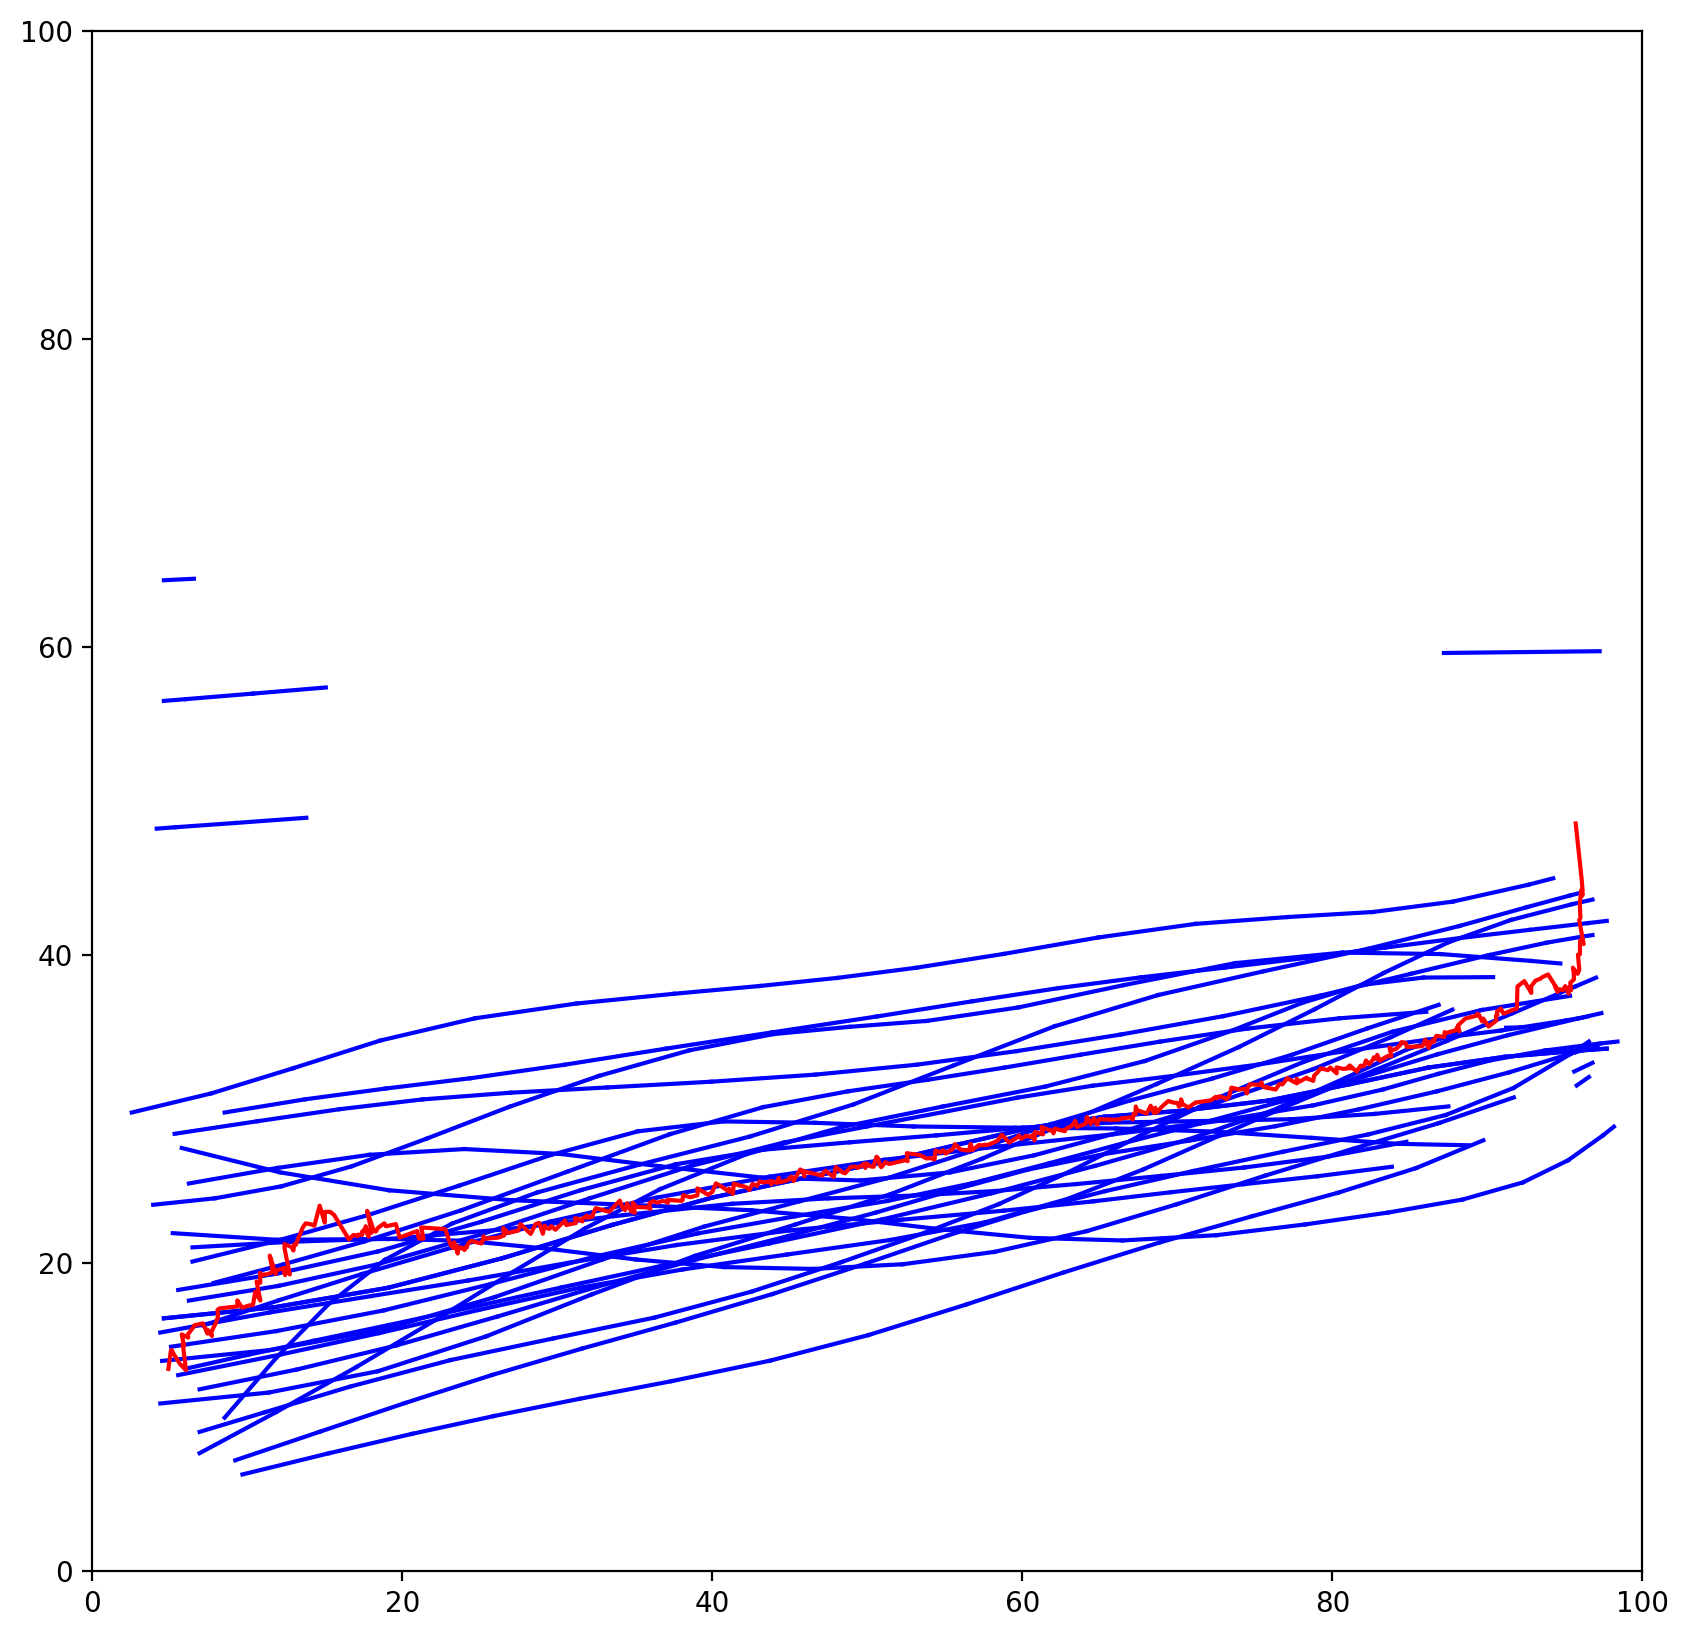

In [47]:
plt.figure(figsize=(10, 10), dpi=200)
show_clusters_and_representative(0)

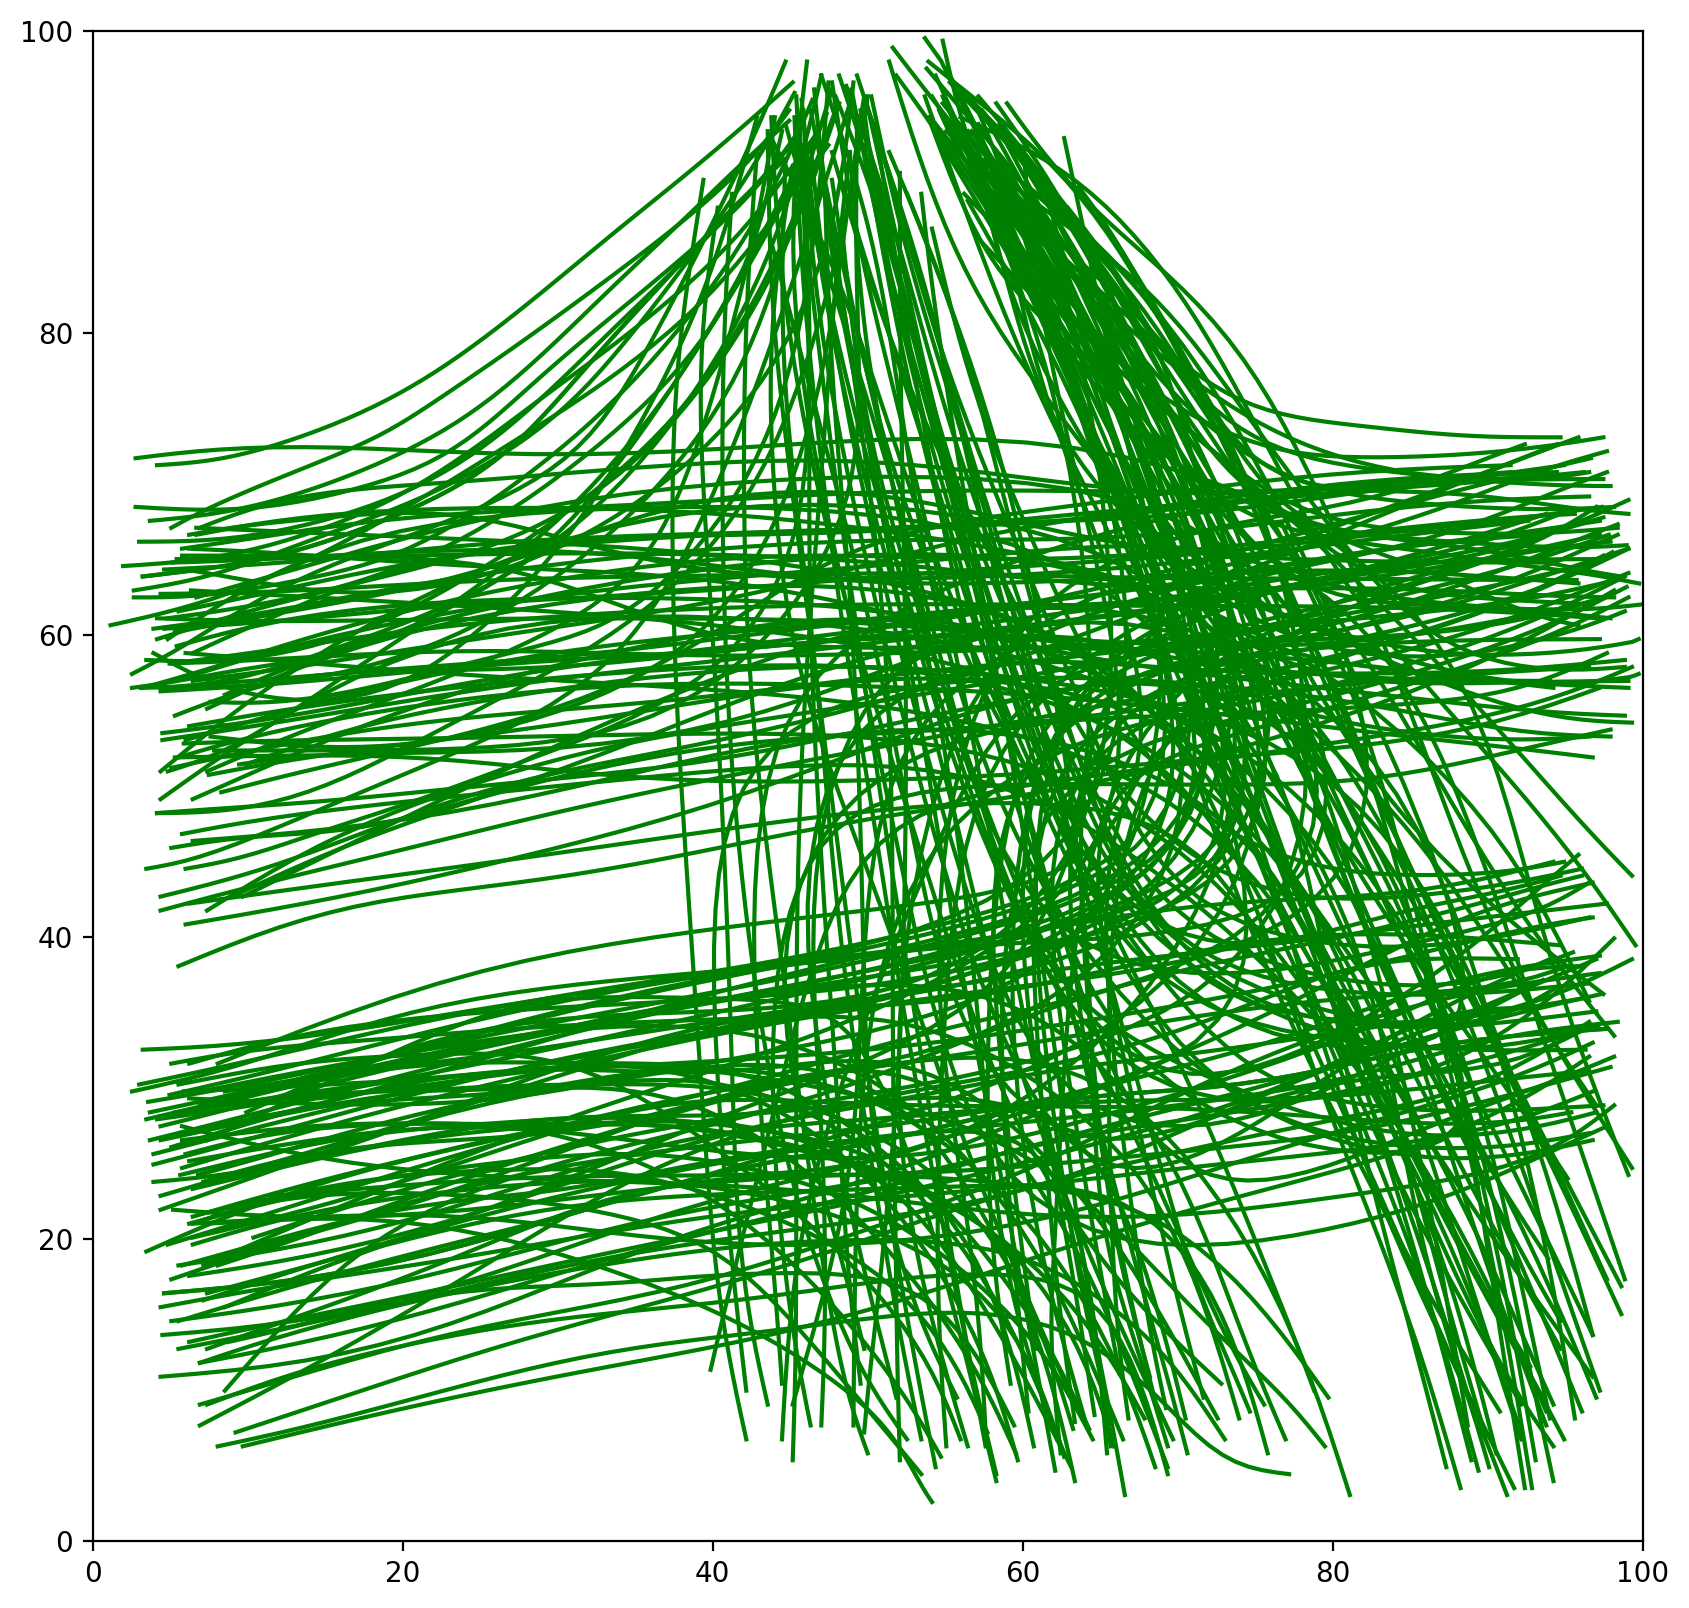

In [4]:
plt.figure(figsize=(10, 10), dpi=200)
show_trajectories(trafics, color='green')
# show_all_cluandrep(clusters, representative_trajectories)

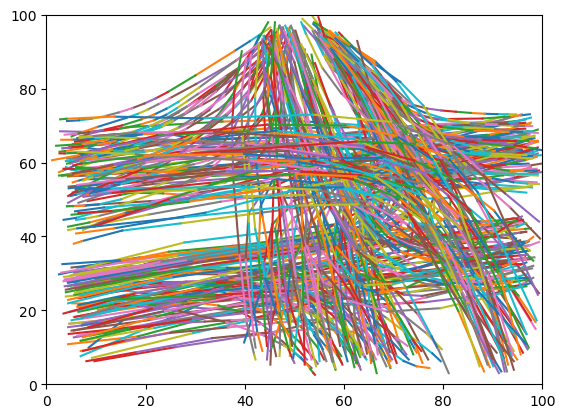

In [ ]:
show_trajectories(segments, color=None)

In [ ]:
trafics.shape

(300, 50, 2)

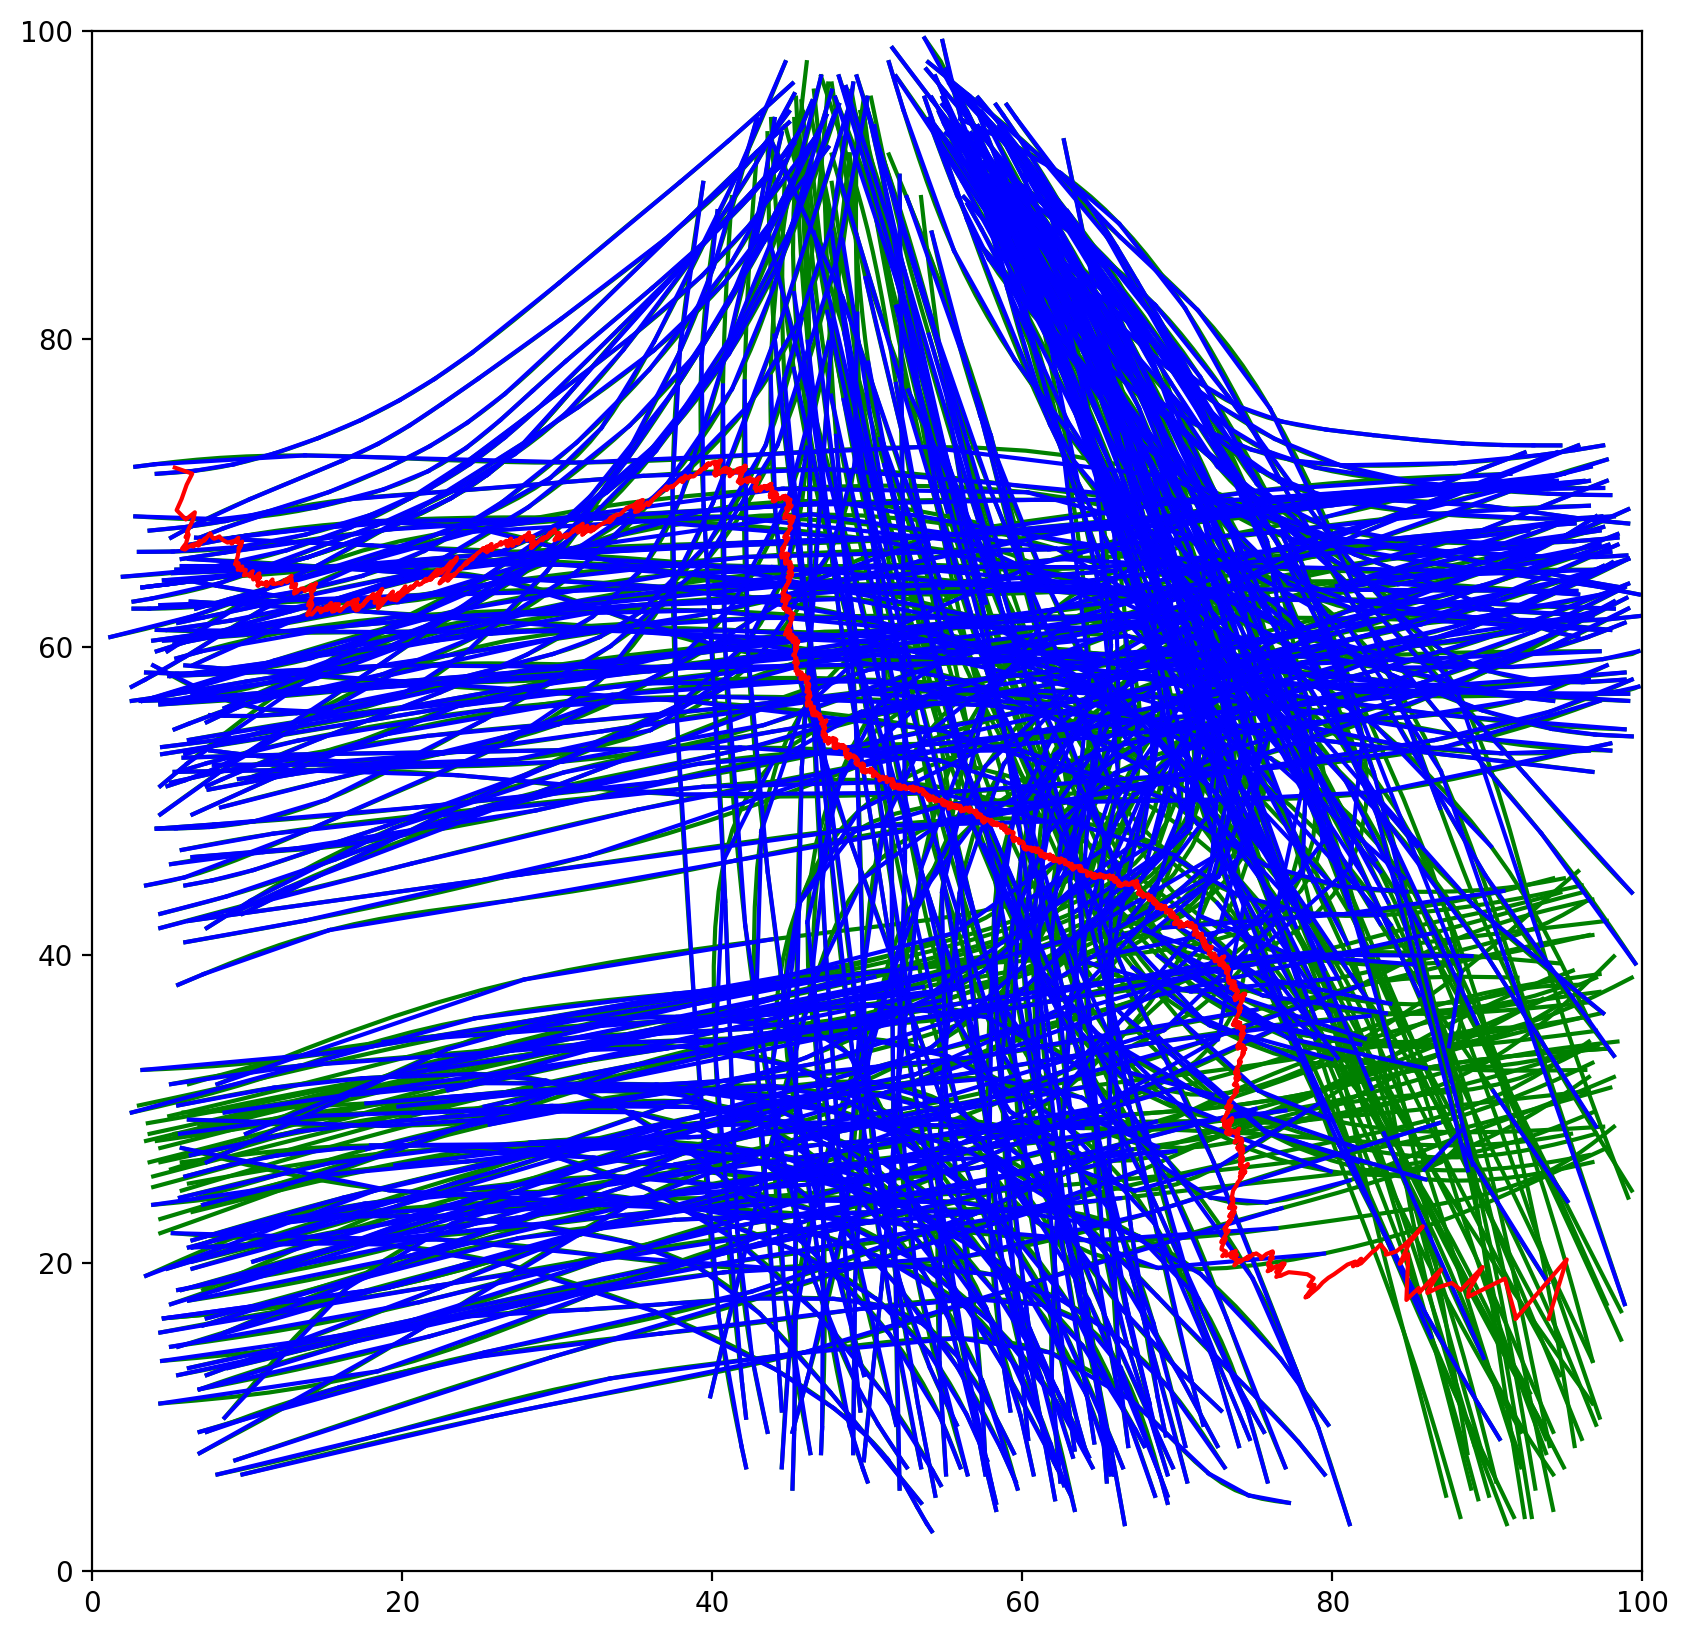

In [ ]:
# 显示所有轨迹
plt.figure(figsize=(10, 10), dpi=200)
show_trajectories(trafics, color='green')
show_clusters_and_representative(0)

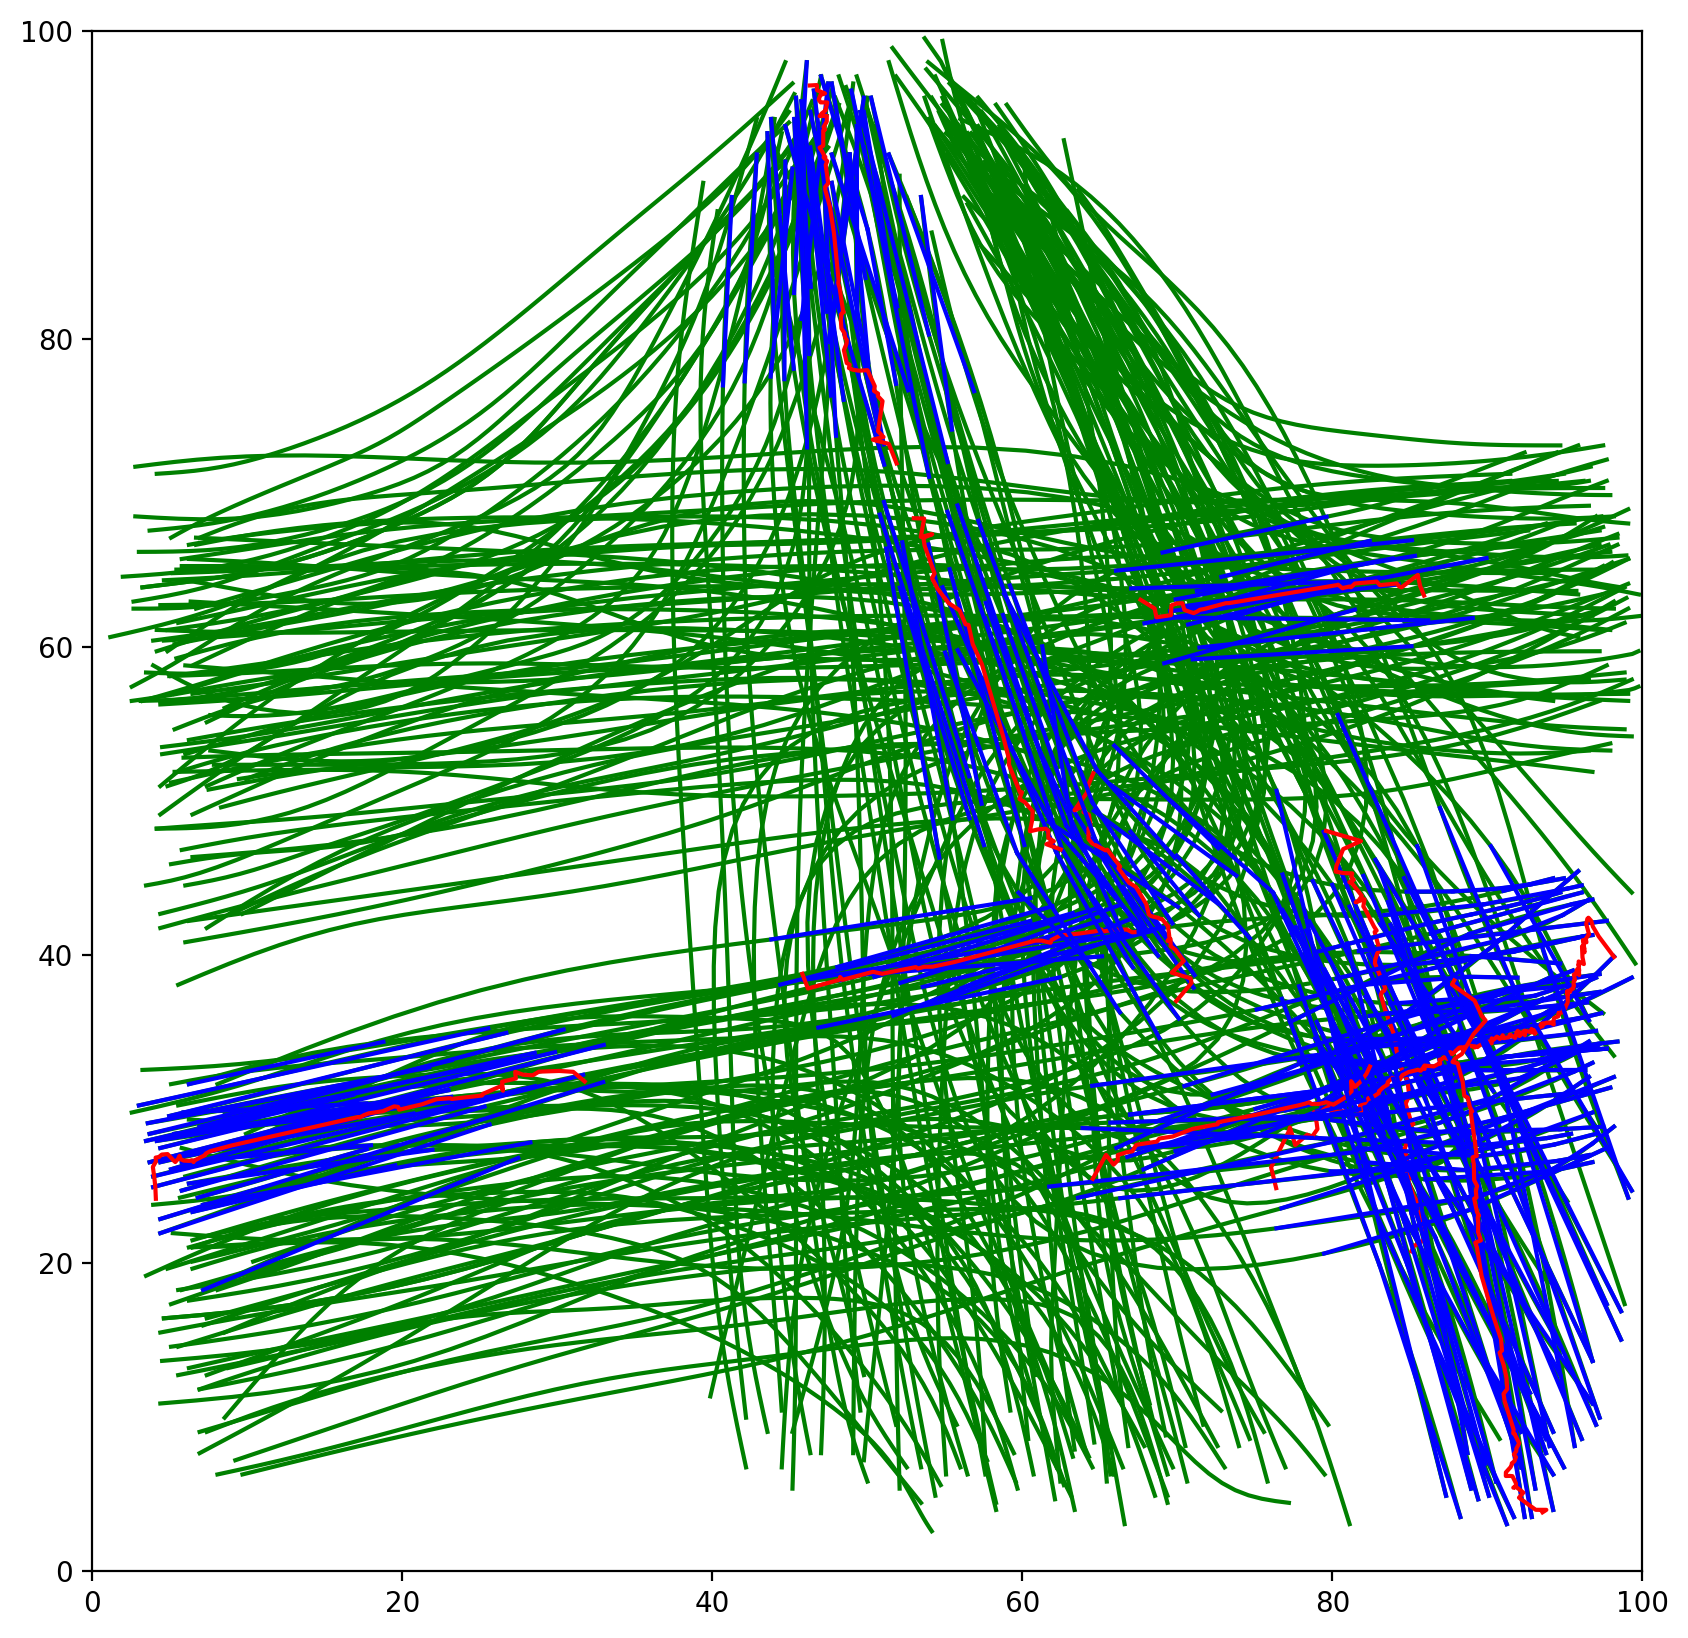

In [ ]:
# 显示所有轨迹
plt.figure(figsize=(10, 10), dpi=200)
show_trajectories(trafics, color='green')
show_all_cluandrep(clusters, representative_trajectories)

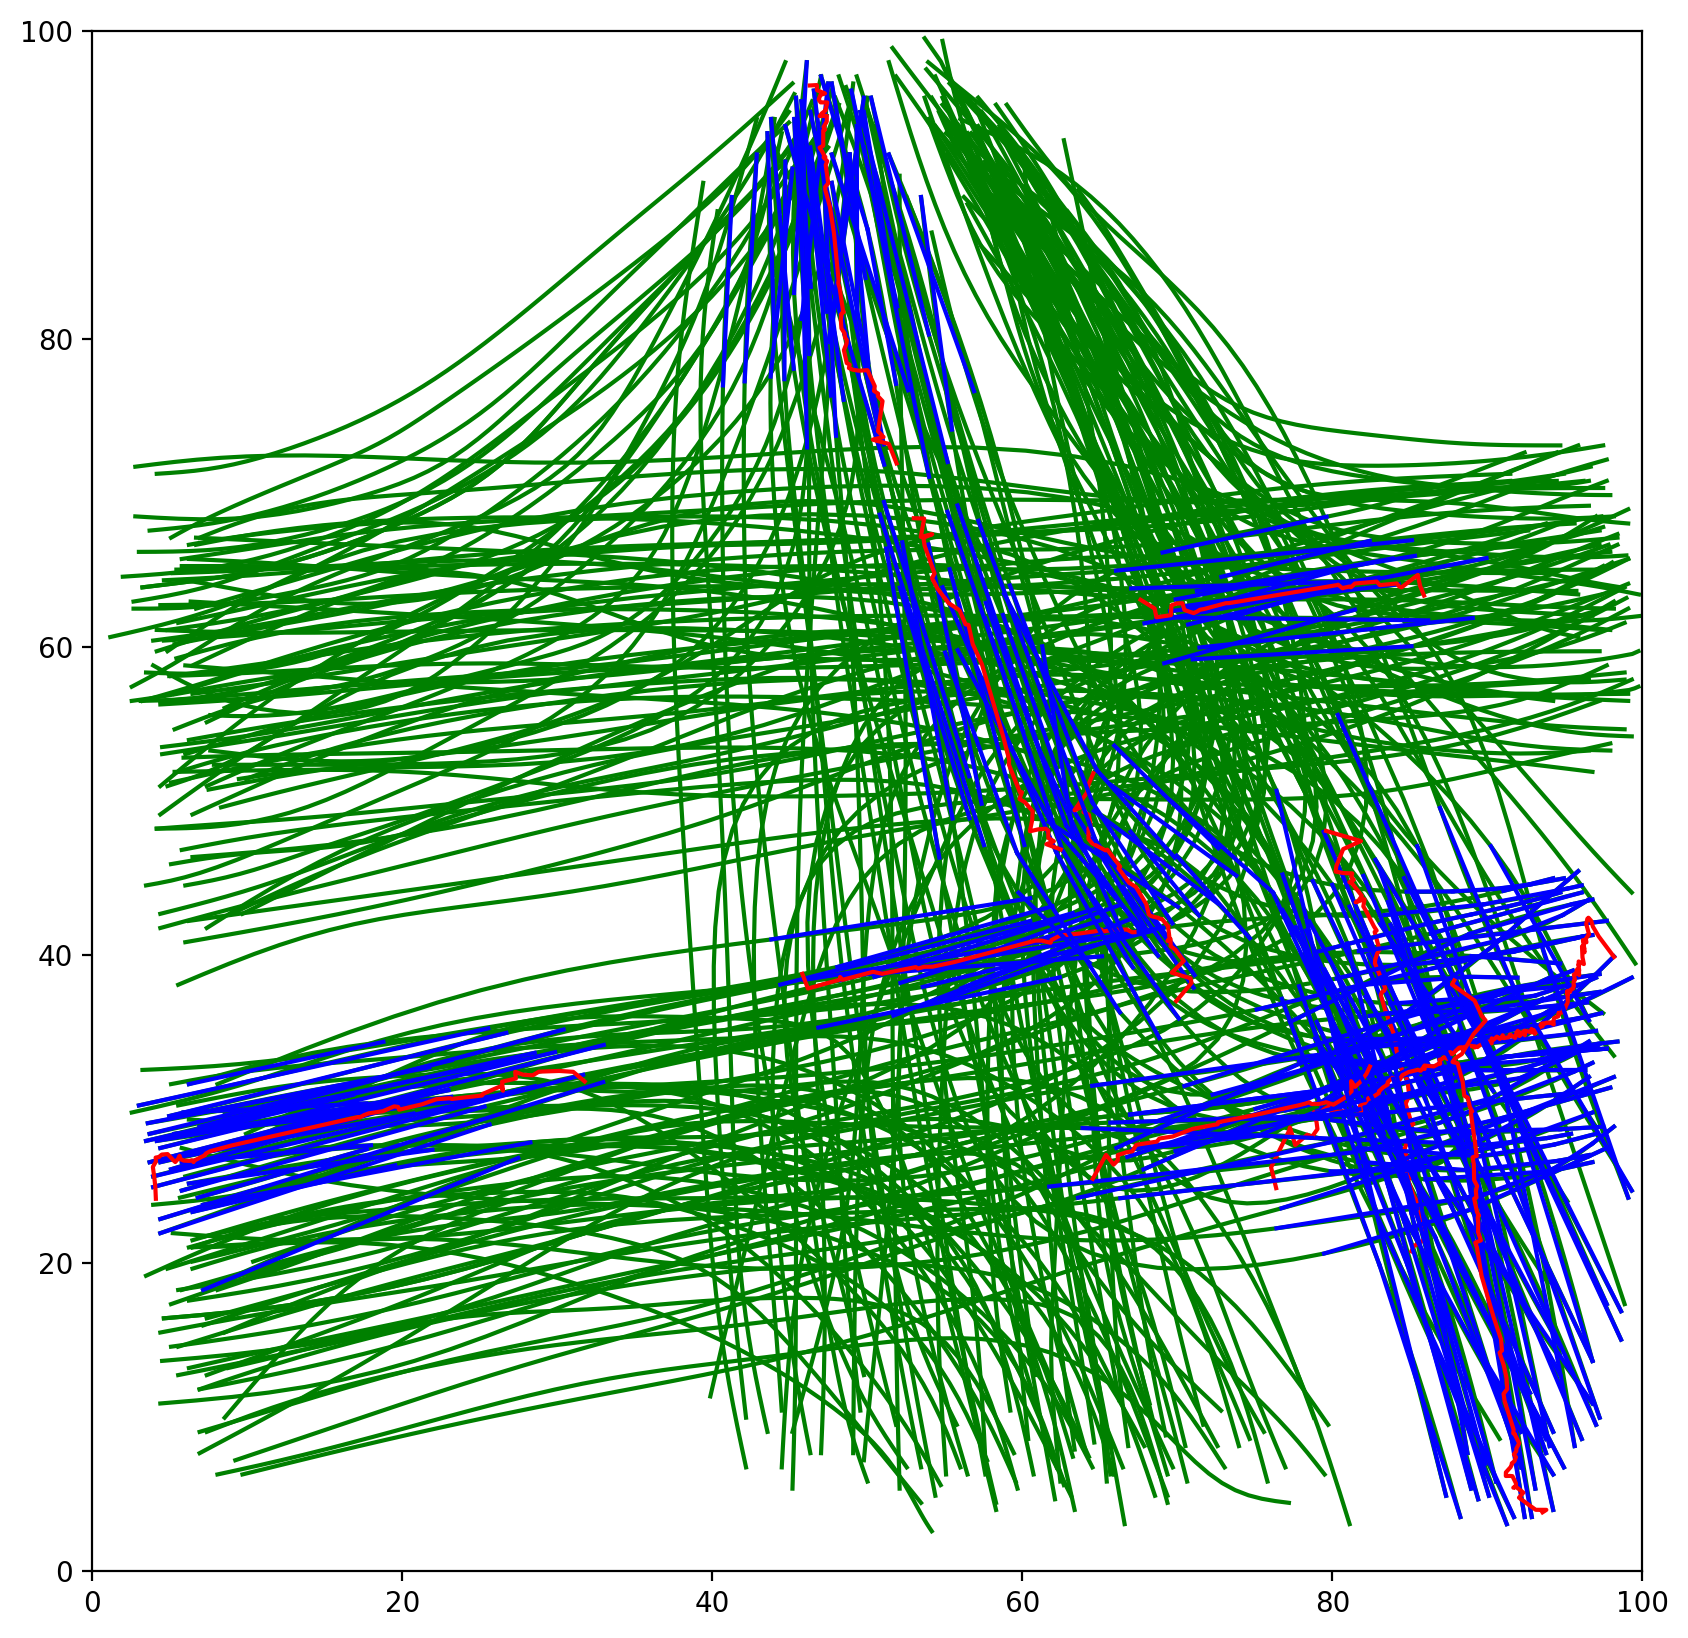

In [ ]:
smoothed_representative_trajectories = [tr.smooth_trajectory(trajectory, window_size=21) for trajectory in representative_trajectories[0]]
plt.figure(figsize=(10, 10), dpi=200)
show_trajectories(trafics, color='green')
show_all_cluandrep(clusters, smoothed_representative_trajectories)